In [28]:
%run MLSD.py
from matplotlib import pyplot as plt

##  Example : Harmonic oscillator

### Print out the degeneracy of the SU(3) Killing forms that are found by the MLSD

In [42]:
mdl = MLSD(phase_dim=6, lie_dim=8, base_NN=M_net, energy_func=energy_ho)
optimizer = torch.optim.Adam(mdl.parameters(), lr=0.1)
for steps in range(2000):
    optimizer.zero_grad()
    xps = torch.randn(100,6,dtype=dtype)
    loss = mdl.loss(xps)
    reg_ind, reg_l1, reg_f = mdl.regs(xps)
    loss = loss + 0.1*reg_ind + 0.01*reg_l1 + 0.01*reg_f
    loss.backward()
    optimizer.step()
E,U = torch.linalg.eigh(mdl.B)
print(E)

tensor([-9.7535, -9.7462, -9.7413, -9.7272, -9.7171, -9.6952, -9.6922, -9.6838],
       dtype=torch.float64, grad_fn=<LinalgEighBackward0>)


#### Visualize the structure coefficients

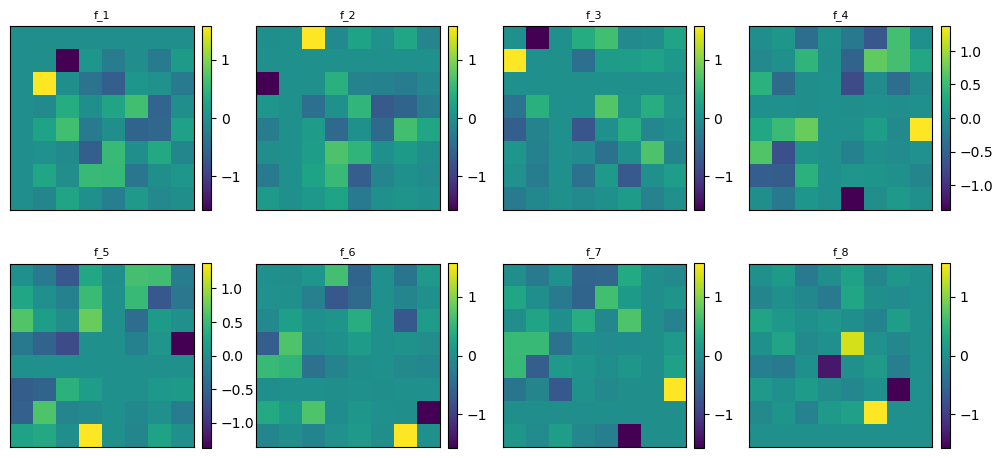

In [101]:
E, U = torch.linalg.eigh(mdl.B) # Diagonalize the Killing form
f_transformed = torch.einsum(mdl.f, [0,1,2], U, [0,3], U, [1, 4], torch.linalg.inv(U), [5, 2], [3,4,5]) # Transform the structure coefficients
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
axes = axes.flatten()

for i in range(8):
    im = axes[i].imshow(f_transformed[i].detach().cpu().numpy())
    axes[i].set_title(f'f_{i+1}', fontsize=8)
    fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.tight_layout()
plt.show()